In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("/home/enes/Desktop/CASEs/anadolu-hayat-datathon/data/train.csv")
df_test = pd.read_csv("/home/enes/Desktop/CASEs/anadolu-hayat-datathon/data/test.csv")

In [3]:
df_train = df_train.drop(columns = ["MUSTERI_ID"])

In [4]:
df_train.head()

,LABEL,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_YATIRIM_KARAKTERI_CVP,SORU_YATIRIM_KARAKTERI_RG,...,HU11,HU12,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG
0,UA,HAZIRAN,2,505,Öğretmen,105,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,0,9
1,UA,HAZIRAN,2,889,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,20,NaN,NaN,...,0,0,0,0,0,0,0,0,0,11
2,HU19,HAZIRAN,2,578,Muhasebe,104,1,6,Yetkin,26.0,...,0,1,0,0,0,0,0,0,0,66
3,UA,MAYIS,2,648,Diğer,106,1,34,NaN,NaN,...,0,0,0,0,0,0,0,0,0,111
4,UA,EYLUL,2,487,İşçi,103,1,77,NaN,NaN,...,0,0,0,0,0,0,0,0,0,90


In [5]:
pd.set_option('display.max_columns', None)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852719 entries, 0 to 852718
Data columns (total 96 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LABEL                       852719 non-null  object 
 1   FLAG                        852719 non-null  object 
 2   PP_CINSIYET                 852719 non-null  int64  
 3   PP_YAS                      852719 non-null  int64  
 4   PP_MESLEK                   764099 non-null  object 
 5   PP_MUSTERI_SEGMENTI         852719 non-null  int64  
 6   PP_UYRUK                    852719 non-null  int64  
 7   IL                          852719 non-null  int64  
 8   SORU_YATIRIM_KARAKTERI_CVP  132698 non-null  object 
 9   SORU_YATIRIM_KARAKTERI_RG   132698 non-null  float64
 10  SORU_MEDENI_HAL_CVP         850939 non-null  object 
 11  SORU_MEDENI_HAL_RG          850939 non-null  float64
 12  SORU_EGITIM_CVP             725624 non-null  object 
 13  SORU_EGITIM_RG

In [6]:
# BETİMSEL İSTATİSTİKLER
pd.set_option('display.max_row', None)
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PP_CINSIYET,852719.0,1.494226,0.499967,1.0,1.0,1.0,2.0,2.0
PP_YAS,852719.0,440.773115,205.058165,0.0,316.0,470.0,585.0,1474.0
PP_MUSTERI_SEGMENTI,852719.0,104.740901,1.425773,101.0,104.0,105.0,106.0,106.0
PP_UYRUK,852719.0,1.007269,0.107100,1.0,1.0,1.0,1.0,3.0
IL,852719.0,31.022318,18.434540,0.0,16.0,34.0,39.0,81.0
SORU_YATIRIM_KARAKTERI_RG,132698.0,28.250674,11.966714,0.0,20.0,29.0,38.0,50.0
SORU_MEDENI_HAL_RG,850939.0,87.329307,69.144079,0.0,23.0,78.0,126.0,1482.0
SORU_EGITIM_RG,725624.0,84.778107,71.030740,0.0,21.0,68.0,125.0,1482.0
SORU_GELIR_RG,574817.0,103.253851,63.343308,0.0,55.0,97.0,141.0,1482.0
SORU_COCUK_SAYISI_CVP,436159.0,0.112335,4.568026,0.0,0.0,0.0,0.0,3000.0


In [7]:
# KORELASYON
numeric_cols = df_train.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr().T
high_correlation = correlation_matrix[(correlation_matrix > 0.50) & (correlation_matrix < 1.0)]
high_corr_pairs = high_correlation.unstack().dropna()
unique_high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

#print(unique_high_corr_pairs.sort_values(ascending=False))
unique_high_corr_pairs.sort_values(ascending=False)

ODEME_TUTAR_1             ODEME_TUTAR_2                0.897206
ODEME_TUTAR_10            VADE_TUTAR_10                0.895806
ODEME_TUTAR_7             VADE_TUTAR_7                 0.895108
ODEME_TUTAR_8             VADE_TUTAR_8                 0.887447
ODEME_TUTAR_2             ODEME_TUTAR_3                0.886402
VADE_TUTAR_1              VADE_TUTAR_2                 0.884879
ODEME_TUTAR_5             VADE_TUTAR_5                 0.884671
ODEME_TUTAR_9             VADE_TUTAR_9                 0.880302
ODEME_TUTAR_3             ODEME_TUTAR_4                0.873287
ODEME_TUTAR_11            VADE_TUTAR_11                0.872803
ODEME_TUTAR_4             VADE_TUTAR_4                 0.870687
ODEME_TUTAR_6             VADE_TUTAR_6                 0.868738
ODEME_TUTAR_7             ODEME_TUTAR_8                0.865653
ODEME_TUTAR_4             ODEME_TUTAR_5                0.864800
ODEME_TUTAR_2             VADE_TUTAR_2                 0.858879
VADE_TUTAR_2              VADE_TUTAR_3  

In [8]:
df_train.isnull().sum().sum()

8248438

In [9]:
def bos_deger_yuzdesi(dataframe):
    bos_deger_sayilari = dataframe.isnull().sum() # Her sütundaki boş değer sayısı
    toplam_veri_noktasi = dataframe.shape[0] # Toplam veri noktası sayısı
    bos_deger_yuzdeleri = (bos_deger_sayilari / toplam_veri_noktasi) * 100 # Boş değer yüzdesi hesaplama
    return bos_deger_yuzdeleri

bos_deger_yuzdesi(df_train).sort_values(ascending = False)

SON_AY_KATKI_MIKTARI          99.885074
SON_AY_KATKI_ADET             99.885074
SON_CEYREK_KATKI_MIKTARI      99.340932
SON_CEYREK_KATKI_ADET         99.340932
SON_SENE_KATKI_ADET           98.240217
SON_SENE_KATKI_MIKTARI        98.240217
SORU_YATIRIM_KARAKTERI_RG     84.438250
SORU_YATIRIM_KARAKTERI_CVP    84.438250
SORU_COCUK_SAYISI_RG          48.850794
SORU_COCUK_SAYISI_CVP         48.850794
SORU_GELIR_CVP                32.590103
SORU_GELIR_RG                 32.590103
SORU_EGITIM_CVP               14.904676
SORU_EGITIM_RG                14.904676
PP_MESLEK                     10.392638
SORU_MEDENI_HAL_CVP            0.208744
SORU_MEDENI_HAL_RG             0.208744
BU12                           0.000000
BU18                           0.000000
BU17                           0.000000
BU16                           0.000000
BU15                           0.000000
BU14                           0.000000
BU13                           0.000000
BU05                           0.000000


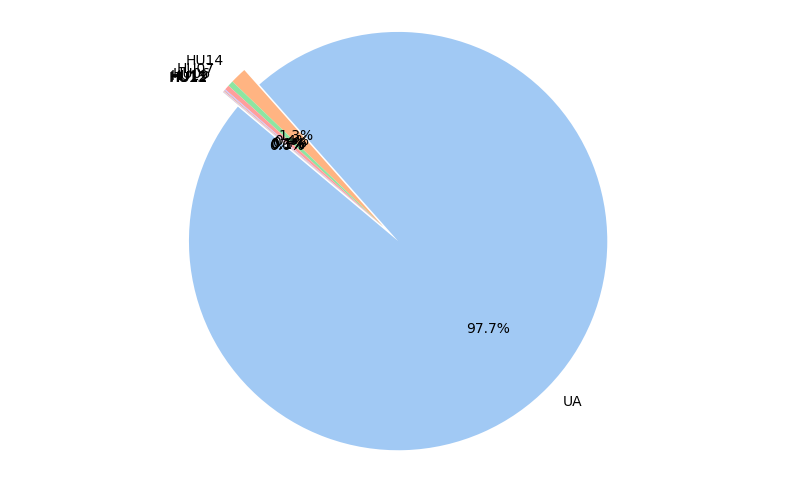

In [10]:
label = df_train['LABEL'].value_counts().head(10)
explode_values = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10, 6))
plt.pie(label, labels=label.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'), explode=explode_values)
plt.axis('equal')  
plt.show()

<AxesSubplot:xlabel='PP_UYRUK', ylabel='count'>

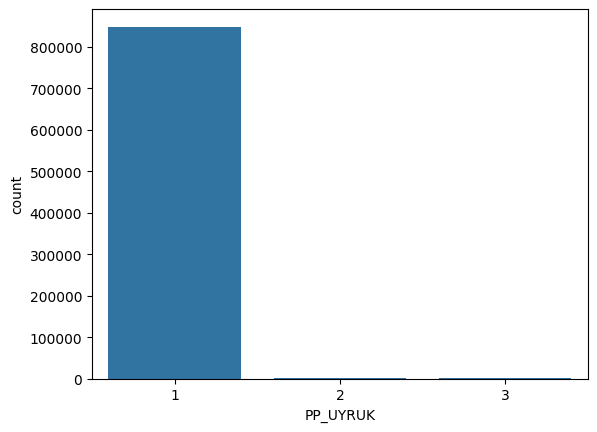

In [11]:
sns.countplot(data=df_train, x='PP_UYRUK')

In [12]:
filtered_df = df_train[df_train['PP_UYRUK'].isin([2, 3])][['LABEL']]

filtered_df.value_counts()

LABEL
UA       4194
HU14      124
HU06       32
HU07       24
HU12        4
HU15        3
HU19        2
HU11        1
Name: count, dtype: int64

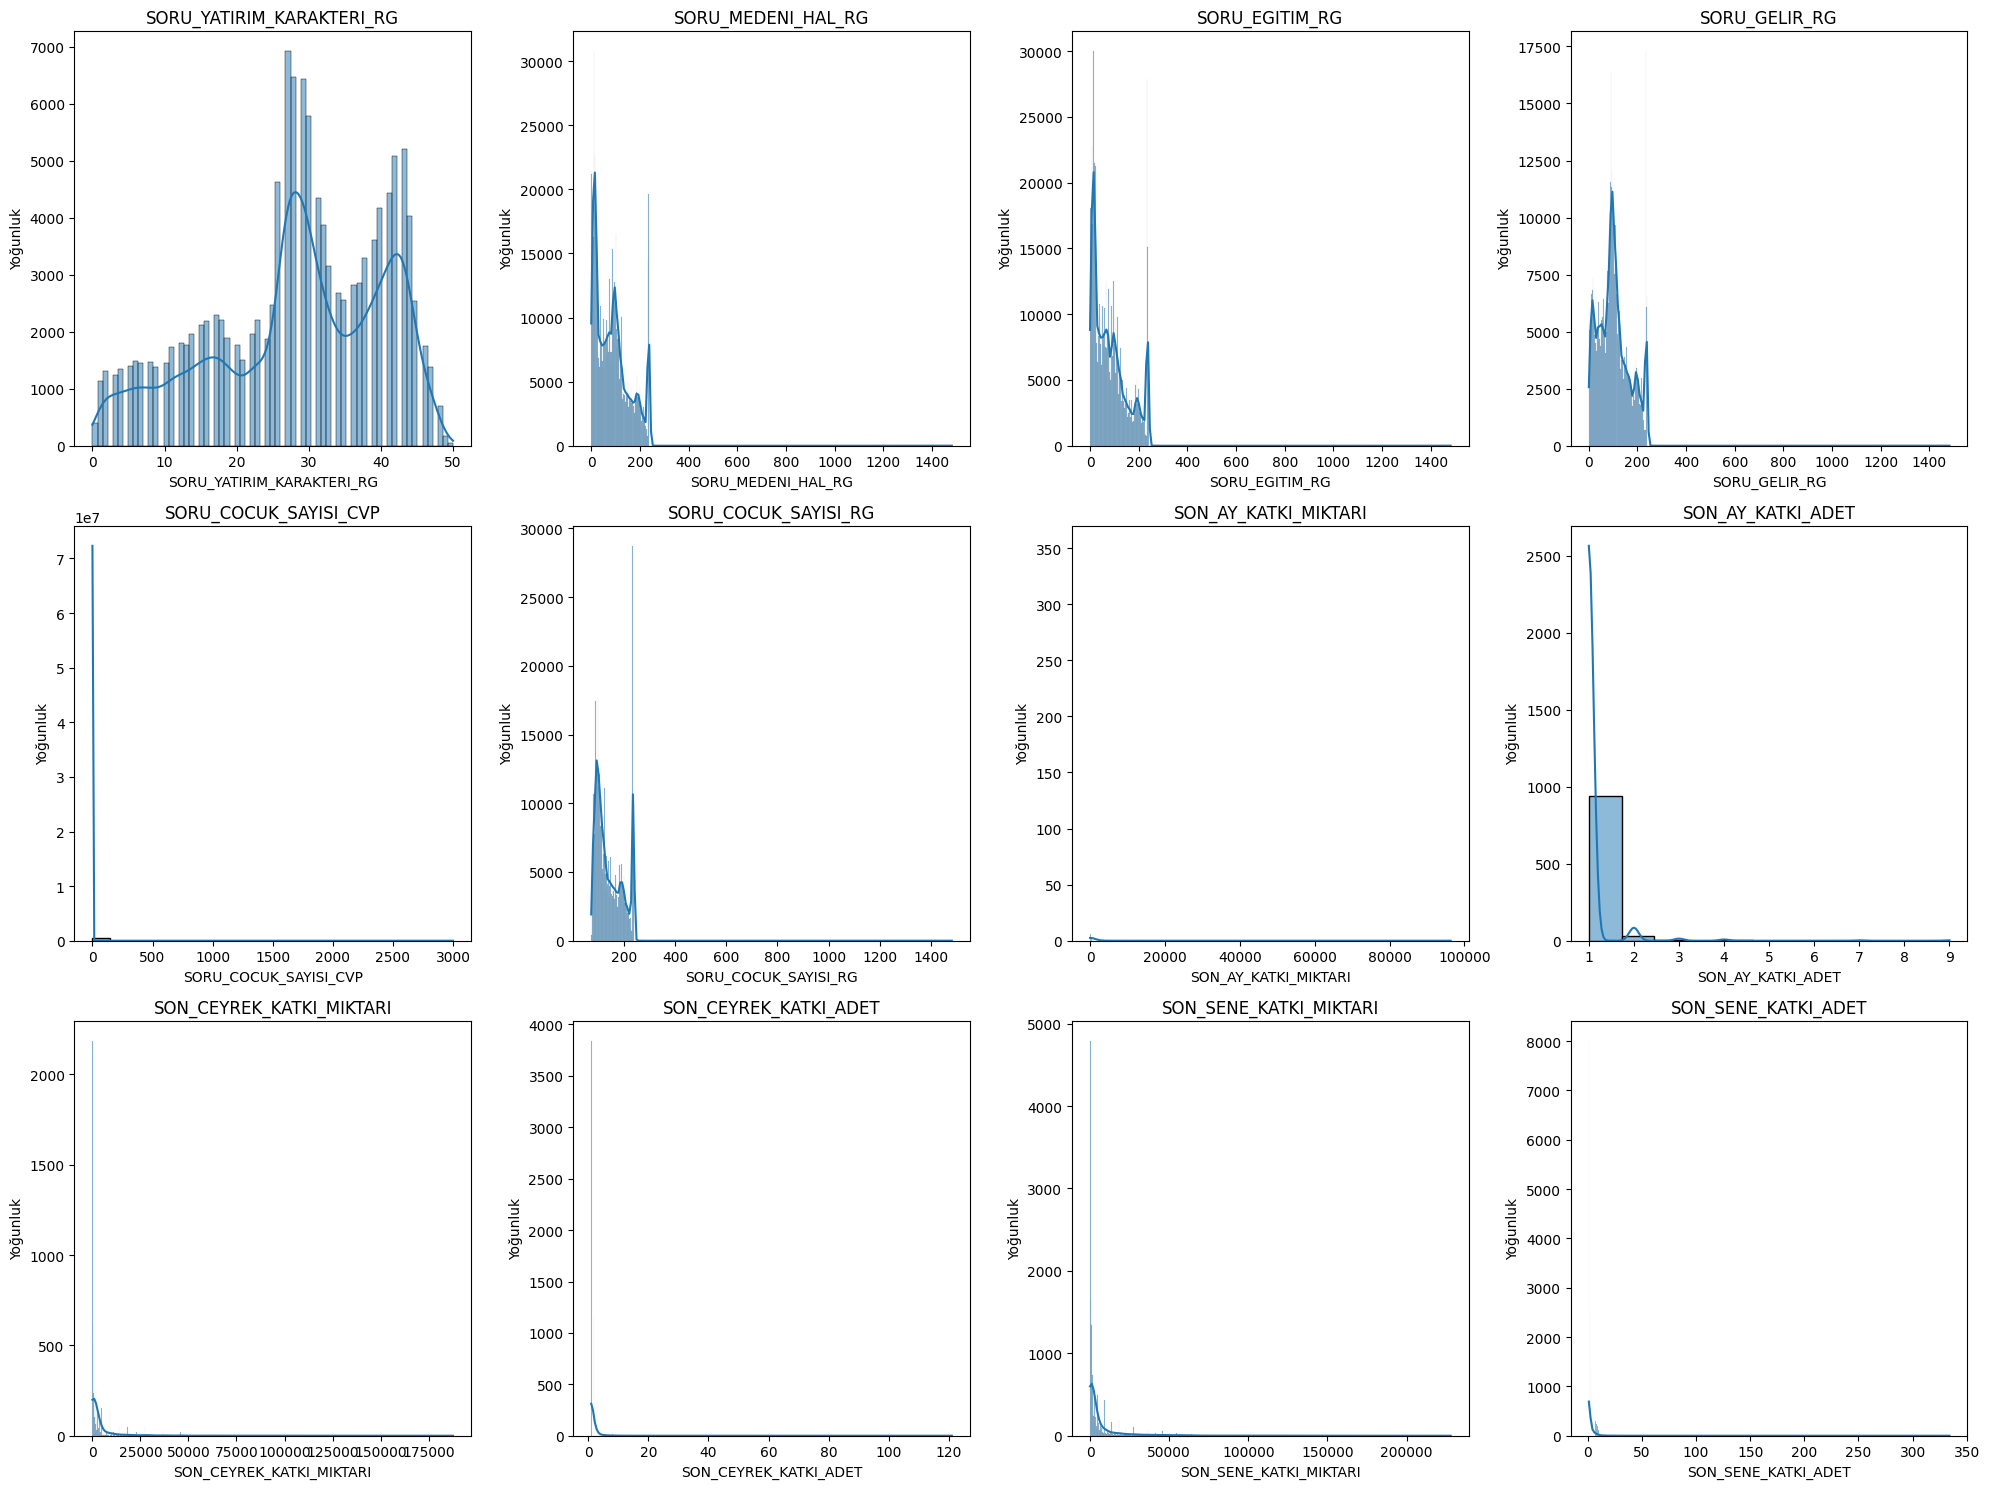

In [13]:
# SÜREKLİ DEĞİŞKENLER
float_columns = df_train.select_dtypes(include=['float64']).columns
num_plots = len(float_columns)
num_cols = 4
num_rows = - (- num_plots // num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
for i, column in enumerate(float_columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(df_train[column], kde=True, ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Yoğunluk')
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

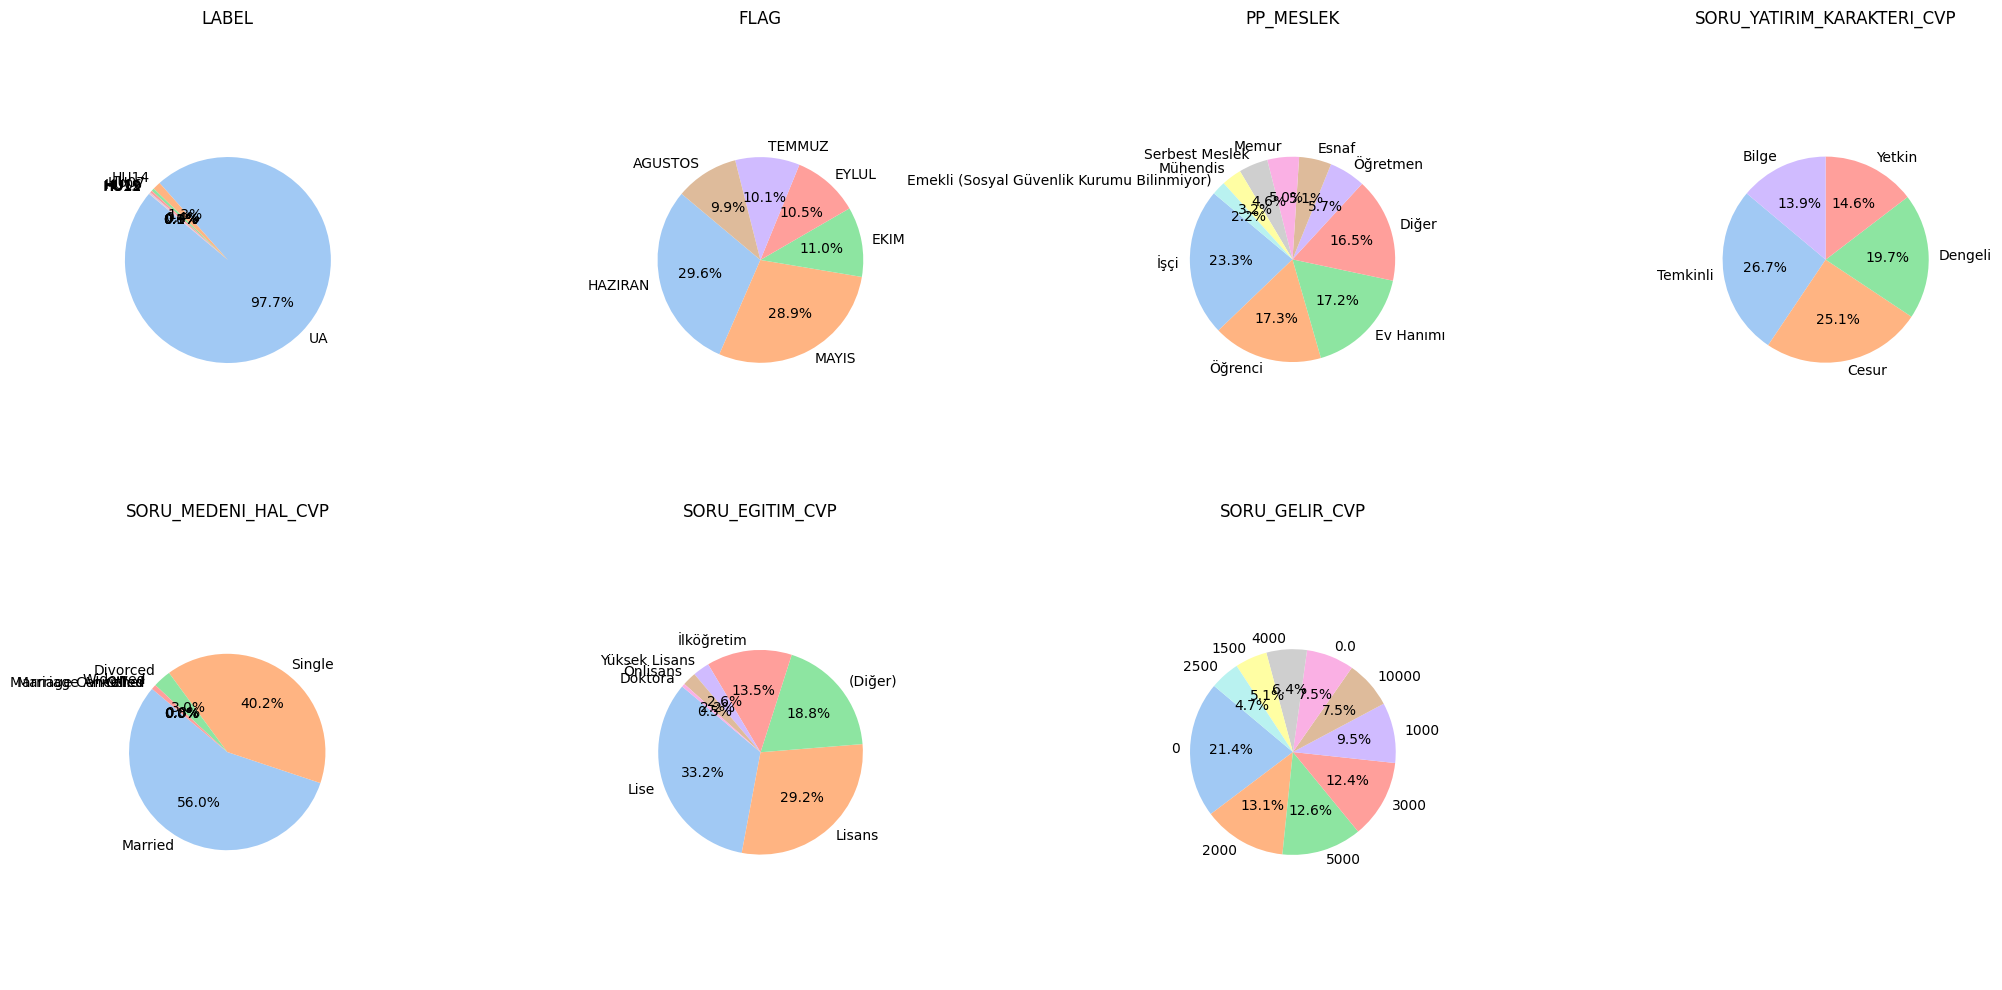

In [15]:
# TOP 10 KATEGORİK PASTA GRAFİĞİ - object
categorical_columns = df_train.select_dtypes(include=['object']).columns

num_plots = len(categorical_columns)
num_columns = 4
num_rows = num_plots // num_columns + (num_plots % num_columns > 0)
plt.figure(figsize=(5 * num_columns, 5 * num_rows))

for index, column in enumerate(categorical_columns):
    top_10 = df_train[column].value_counts().head(10)
    plt.subplot(num_rows, num_columns, index + 1)
    plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{column.upper()}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

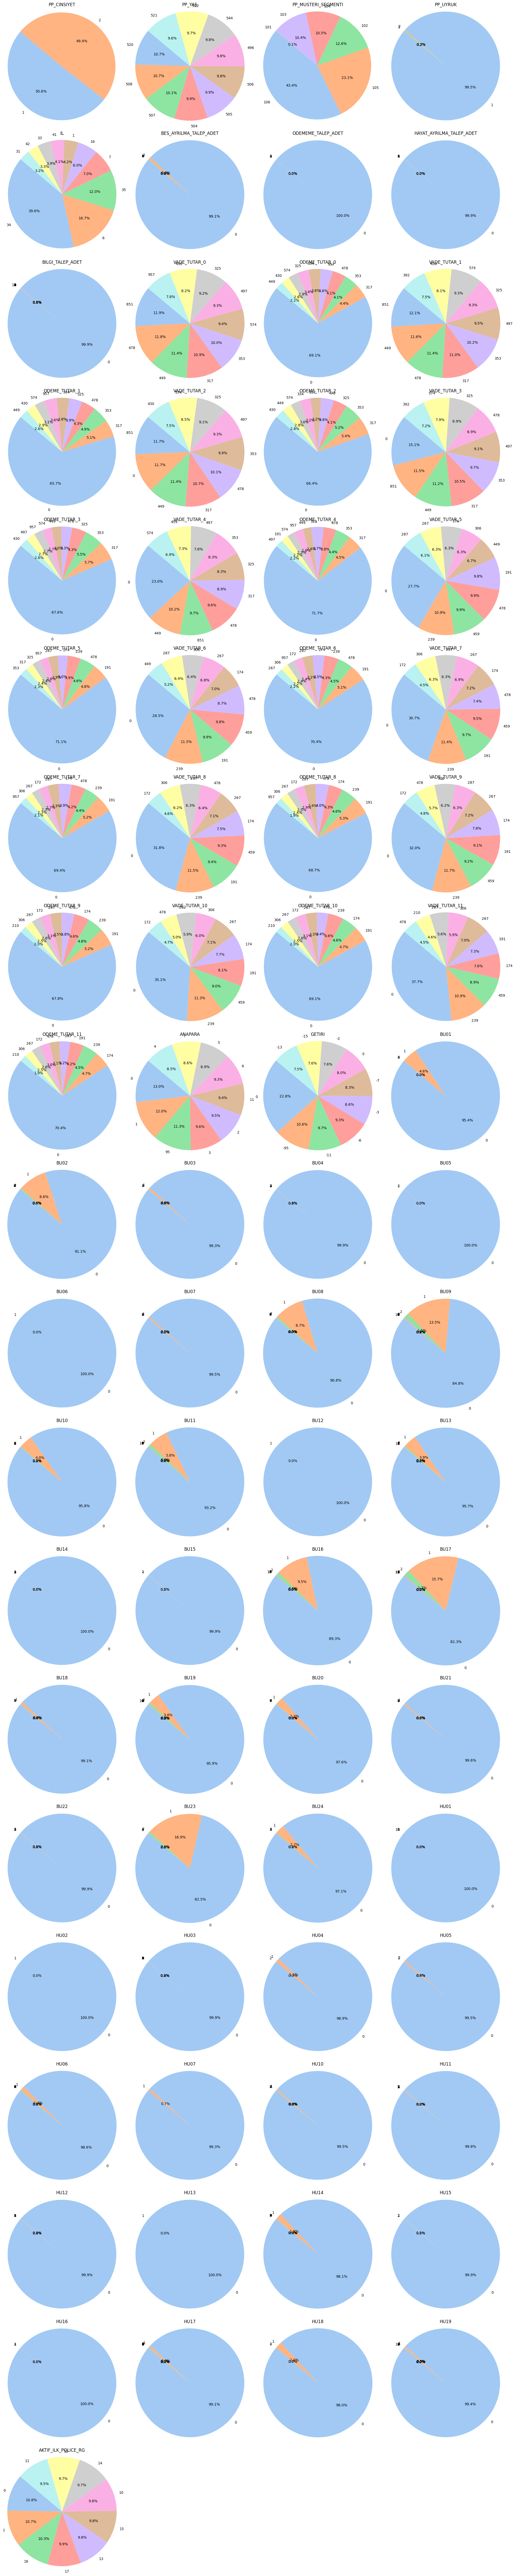

In [16]:
# TOP 10 KATEGORİK PASTA GRAFİĞİ - ınt64
categorical_columns = df_train.select_dtypes(include=['int64']).columns

num_plots = len(categorical_columns)
num_columns = 4
num_rows = num_plots // num_columns + (num_plots % num_columns > 0)
plt.figure(figsize=(5 * num_columns, 5 * num_rows))
for index, column in enumerate(categorical_columns):
    top_10 = df_train[column].value_counts().head(10)
    plt.subplot(num_rows, num_columns, index + 1)
    plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{column.upper()}')
    plt.axis('equal')
plt.tight_layout()
plt.show()